Here, I simulate an agent based model of Wealth transfer. The model explores the distribution of wealth under a trading population of agents. Each agent starts with one unit of wealth. During each timestep, each agent with positive wealth randomly selects a trading partner and gives them one unit of their wealth. This random interaction creates an inequality of wealth that follows a Boltzmann distribution.  
The Gini coefficient measures wealth inequality between the agents.

In [1]:
import agentpy as ap
import numpy as np
import seaborn as sns

In [2]:
class WealthAgent(ap.Agent):
    """
    An agent with wealth
    """
    
    def setup(self):
        
        self.wealth = 1
        
    def wealth_transfer(self):
        
        if self.wealth > 0:
            
            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1
            

In [11]:
def gini(x):
    """
    Calculate Gini coefficient
    """
    x = np.array(x)
    mad = np.abs(np.subtract.outer(x,x)).mean()   #Mean absolute difference
    rmad = mad / np.mean(x)                        #Relative mean absolute difference
    return 0.5 * rmad

In [12]:
class WealthModel(ap.Model):
    """
    A simple model of random wealth transfers
    """
    
    def setup(self):
        
        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)
        
    def step(self):
        
        self.agents.wealth_transfer()
        
    def update(self):
        
        self.record("Gini Coefficient", gini(self.agents.wealth))
        
    def end(self):
        
        self.agents.record("wealth")

**Simulation run**

In [13]:
parameters = {
    "agents": 100,
    "steps": 100,
    "seed": 42
}

In [14]:
model = WealthModel(parameters)
results = model.run()

Completed: 100 steps
Run time: 0:00:00.069052
Simulation finished


**Output analysis**

In [15]:
results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 3 keys
'variables': 
    'WealthModel': DataFrame with 1 variable and 101 rows
    'WealthAgent': DataFrame with 1 variable and 100 rows
'reporters': DataFrame with 1 variable and 1 row
}

In [16]:
results.info

{'model_type': 'WealthModel',
 'time_stamp': '2022-09-21 22:44:17',
 'agentpy_version': '0.1.5',
 'python_version': '3.9.1',
 'experiment': False,
 'completed': True,
 'created_objects': 100,
 'completed_steps': 100,
 'run_time': '0:00:00.069052'}

In [17]:
results.variables.WealthModel.head()

,Gini Coefficient
t,
0,0.0000
1,0.5370
2,0.5690
3,0.5614
4,0.5794


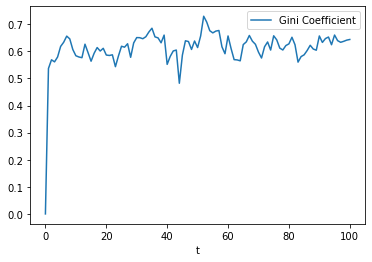

In [18]:
data = results.variables.WealthModel
ax = data.plot()

<AxesSubplot:ylabel='Count'>

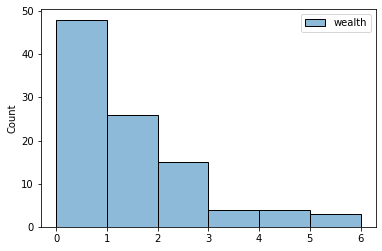

In [19]:
sns.histplot(data = results.variables.WealthAgent, binwidth = 1)

The result resembles a Boltzmann distribution. 